In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
# Load file in, make as a data frame, clean up data we don't want.

infile = 'donors_data.csv'

donors = pd.read_csv(infile)

## remove columns - axis, 0 for rows and 1 for columns and edit dataframe in place

donors.drop(
    [
        'INDEX',
        'REG1',
        'REG2',
        'REG3',
        'REG4'
    ],
    axis=1,
    inplace=True
)

donors.describe()

,HOME,NUMCHLD,INCOME,GENDER,WEALTH,HV,INCM,INCAVG,LOWINC,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,0.770192,1.069231,3.893910,0.609295,6.402244,1141.361859,388.217308,432.088141,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,0.420777,0.347688,1.636186,0.487987,2.539978,946.642162,172.815950,168.195104,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,1.000000,1.000000,3.000000,0.000000,5.000000,556.000000,278.000000,318.000000,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,1.000000,1.000000,4.000000,1.000000,8.000000,822.000000,356.000000,396.000000,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,1.000000,1.000000,5.000000,1.000000,8.000000,1338.750000,465.000000,516.000000,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,1.000000,5.000000,7.000000,1.000000,9.000000,5945.000000,1500.000000,1331.000000,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


In [8]:
##
## home value vs avg gift dollar amount
##

hv = donors.loc[:,['HV']]
avg_gift = donors.loc[:,['AVGGIFT']]
case_1 = donors[['HV', 'AVGGIFT']]

## normalize data
hv_norm = (hv - hv.mean()) / (hv.max() - hv.min())
avg_gift_norm = (avg_gift - avg_gift.mean()) / (avg_gift.max() - avg_gift.min())

## apply pca
pca_1 = PCA(n_components=1).fit(avg_gift_norm)
pca_1a = pca_1.transform(avg_gift_norm)
pca_1w = pca_1.transform(hv_norm)

In [15]:
## implement kmeans
kmeans = KMeans(n_clusters=10)
kmeans_output = kmeans.fit(avg_gift_norm)
plt.scatter(pca_1w[:, 0], pca_1a[:, 0], c=kmeans_output.labels_, s=50, alpha=.25)
plt.xlabel('home value')
plt.ylabel('average gift')

Text(0, 0.5, 'average gift')

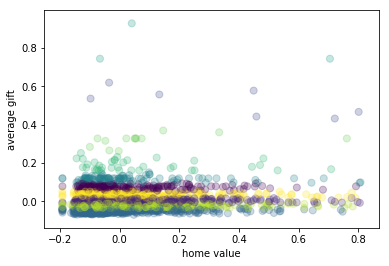

In [16]:
## show visualization
plt.show('kmeans_hv_gift')

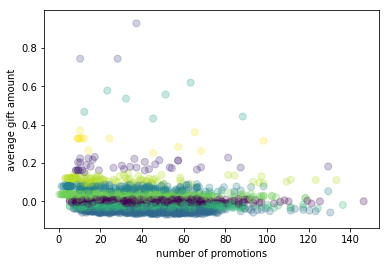

In [17]:
##
## number of promotions vs avg gift: data was not normalized
##
num_prom = donors.loc[:,['NUMPROM']]
avg_gift = donors.loc[:,['AVGGIFT']]
case_2 = donors[['NUMPROM', 'AVGGIFT']]

## apply pca
pca_1 = PCA(n_components=1).fit(avg_gift)
pca_1c = pca_1.transform(num_prom)

## implement kmeans
kmeans = KMeans(n_clusters=10)
kmeans_output = kmeans.fit(avg_gift)
plt.scatter(pca_1c[:, 0], pca_1a[:, 0], c=kmeans_output.labels_, s=50, alpha=.25)
plt.xlabel('number of promotions')
plt.ylabel('average gift amount')

## save visualization
plt.show('kmeans_prom_gift')

In [20]:
##
## calculate average total months since last gift aggregated on income
##
with open('summary.txt', 'w') as f:
    months_since = donors.groupby(['INCOME'])['totalmonths'].mean()

    f.write('income groups: {}\n\n'.format(donors.groupby(['INCOME']).groups.keys()))

    for value in months_since:
        f.write('average total months since last gift (per income): {:.2f}\n'.format(float(value)))